### Task 5

#### Prediction using Decision Tree Algorithem

##### Level(Intermediate)

Decision tree is one of the supervised machine learning techinque which is used for both Regression and classification usecases.
As the name suggests , the algorithem works by dividing the whole dataset in to tree-like based structure based on the some conditions like (if and else).It is more versatile and work great with the complex datasets.
It is easy to understand to read and flexible to work.

In [50]:
#Load the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
#Get the data and read 
from sklearn import datasets
iris=datasets.load_iris()

In [52]:
df=pd.DataFrame(data=iris.data,columns=iris.feature_names)
df['Target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [53]:
#Get the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [54]:
#get the statistical,description of the data
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [55]:
#Split the data in to x and y
x=df.drop('Target',1)
y=df['Target']

In [56]:
#Splitting the data in to train and validation data sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print('X_train: ',x_train.shape)
print('X_test: ',x_test.shape)
print('Y_train: ',y_train.shape)
print('Y_test: ',y_test.shape)

X_train:  (120, 4)
X_test:  (30, 4)
Y_train:  (120,)
Y_test:  (30,)


In [57]:
#Model building
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [58]:
#Predict on the validation data
y_pred=tree.predict(x_test)
y_pred[:10]

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1])

In [59]:
#Get the score on train data and test data
print('Train score: ',tree.score(x_train,y_train))
print('Test score: ',tree.score(x_test,y_test))

Train score:  1.0
Test score:  1.0


In [60]:
#Get the performance of the model on the validation data
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
print('Accuracy score: ',accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy score:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


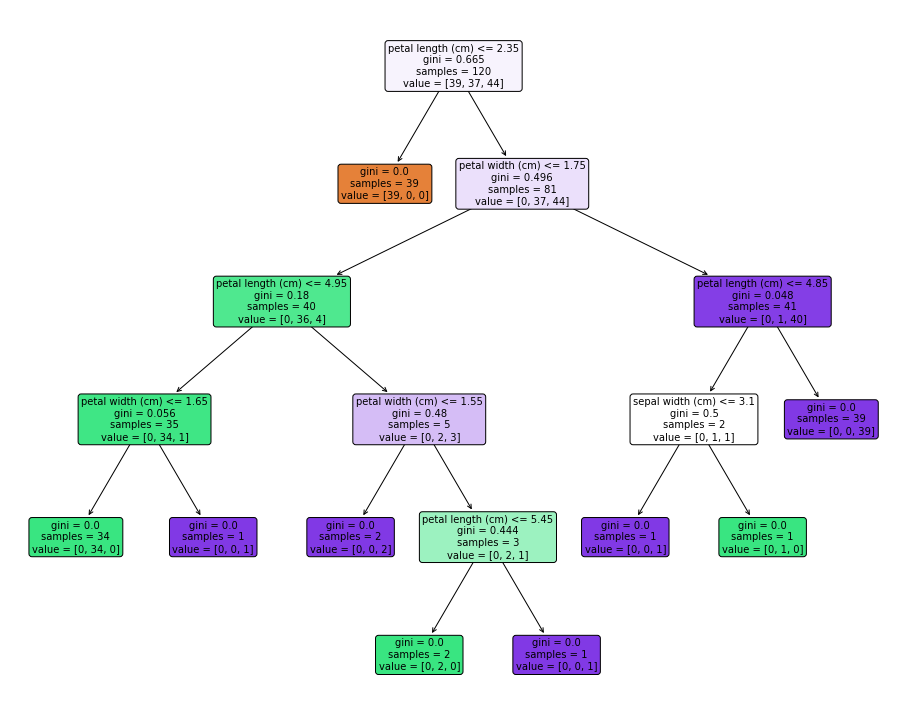

In [62]:
from sklearn.tree import export_graphviz,plot_tree,export_text
from IPython.display import Image
from six import StringIO
import graphviz
import pydotplus
plt.figure(figsize=(16,13))
plot_tree(tree,feature_names=x.columns,filled=True,rounded=True)
plt.show()

In [72]:
#Also we can adjust the depth of the tree,max features,nodes,class weight by hyper parameter tuning
tree1=DecisionTreeClassifier(max_depth=10,max_leaf_nodes=7,class_weight='balanced')
tree1.fit(x_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10, max_leaf_nodes=7)

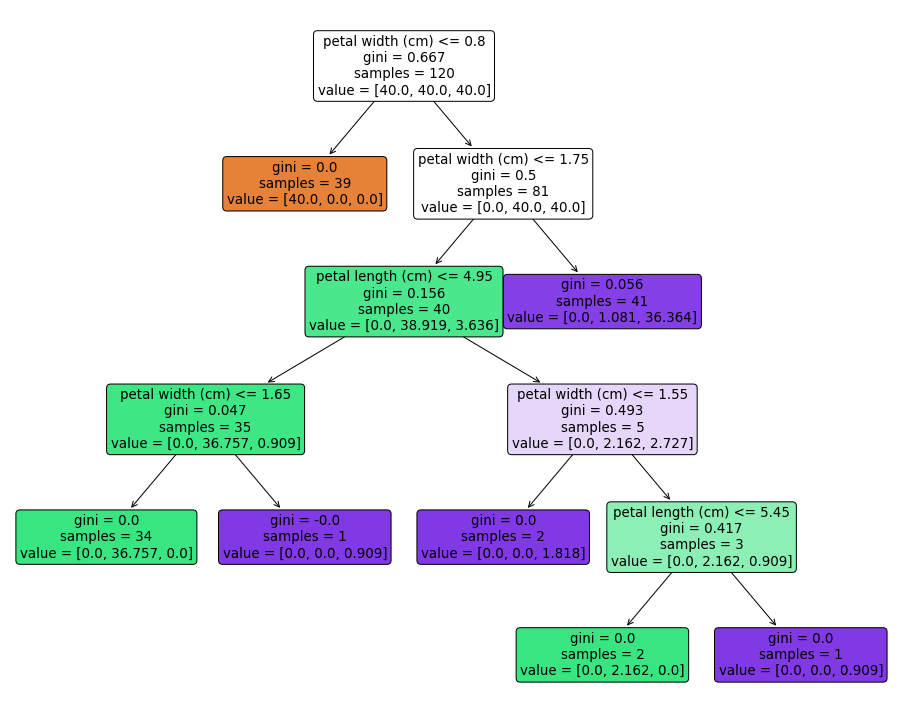

In [73]:
plt.figure(figsize=(16,13))
plot_tree(tree1,feature_names=x.columns,filled=True,rounded=True)
plt.show()